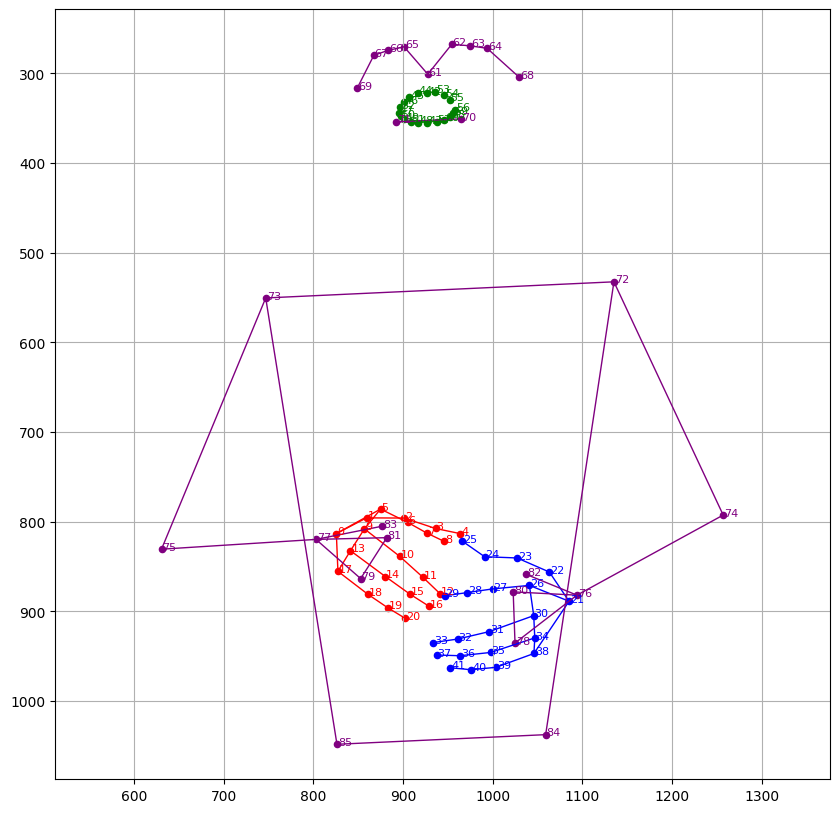

In [4]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import mediapipe as mp

# # Load the pickle file
# with open('/data/sharedData/pose_data_isharah2000_hands_lips_body.pkl', 'rb') as f:
#     data_dict = pickle.load(f)

# # Load the pickle file (Task-1)
# with open('/home/cpami-llm/CPAMI_WorkPlace/Rezwan/MSLR-2025/public_si_dat/pose_data_isharah1000_hands_lips_body_May12.pkl', 'rb') as f:
#     data_dict = pickle.load(f)

# Load the pickle file (Task-2)
with open('/home/cpami-llm/CPAMI_WorkPlace/Rezwan/MSLR-2025/public_us_dat/pose_data_isharah1000_hands_lips_body_May12.pkl', 'rb') as f:
    data_dict = pickle.load(f)

 
# Choose a sample
sample_key = list(data_dict.keys())[0]
keypoints = data_dict[sample_key]['keypoints']  # shape (T, J, 2)
frame = keypoints[0]

# Get parts: rh, lh, lips, body
NUM_LIPS = 19  # after deduplication
rh = frame[0:21]
lh = frame[21:42]
lips = frame[42:42+NUM_LIPS]
body = frame[42+NUM_LIPS:]

# Combine all parts into a single array for index referencing
combined = np.concatenate([rh, lh, lips, body], axis=0)

# Define offsets for drawing connections using correct indices
rh_offset = 0
lh_offset = 21
lips_offset = 42
body_offset = 42 + NUM_LIPS

# Plot setup
plt.figure(figsize=(10, 10))
ax = plt.gca()

def draw_connections(part, connections, offset, color):
    for conn in connections:
        start_idx, end_idx = conn
        start = offset + start_idx
        end = offset + end_idx
        if start < len(combined) and end < len(combined):
            x1, y1 = combined[start]
            x2, y2 = combined[end]
            plt.plot([x1, x2], [y1, y2], color=color, linewidth=1)

def draw_points(part, offset, color):
    for i, (x, y) in enumerate(part):
        global_idx = offset + i
        plt.scatter(x, y, color=color, s=20)
        plt.text(x + 1, y + 1, str(global_idx), fontsize=8, color=color)

# Draw each component
draw_connections(rh, mp.solutions.hands.HAND_CONNECTIONS, rh_offset, 'red')
draw_connections(lh, mp.solutions.hands.HAND_CONNECTIONS, lh_offset, 'blue')
# draw_connections(lips, mp.solutions.face_mesh.FACEMESH_LIPS, lips_offset, 'green')
draw_connections(body, mp.solutions.holistic.POSE_CONNECTIONS, body_offset, 'purple')

draw_points(rh, rh_offset, 'red')
draw_points(lh, lh_offset, 'blue')
draw_points(lips, lips_offset, 'green')
draw_points(body, body_offset, 'purple')

#plt.title(f'Frame Visualization with Keypoint Indices\n{sample_key}')
plt.gca().invert_yaxis()
plt.axis('equal')
plt.grid(True)
plt.show()
